In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib_venn import venn2
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import scale

df = pd.read_csv('005_data/SRR7217928_data.csv')
df1 = pd.read_csv('005_data/SRR7217929_data.csv')
df2 = pd.read_csv('005_data/SRR7217930_data.csv')

dfs = pd.concat([df, df1, df2])
X = dfs.drop(columns=['pred', 'SysName1', 'SysName2', 'Strand1', 'Strand2'])

y = dfs[['pred']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[[146  16]
 [ 24 234]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       162
           1       0.94      0.91      0.92       258

    accuracy                           0.90       420
   macro avg       0.90      0.90      0.90       420
weighted avg       0.91      0.90      0.91       420

0.9047619047619048
0.936
0.9069767441860465


Text(0.5, 1.0, 'Confusion Matrix for the Operon prediction with three votes')

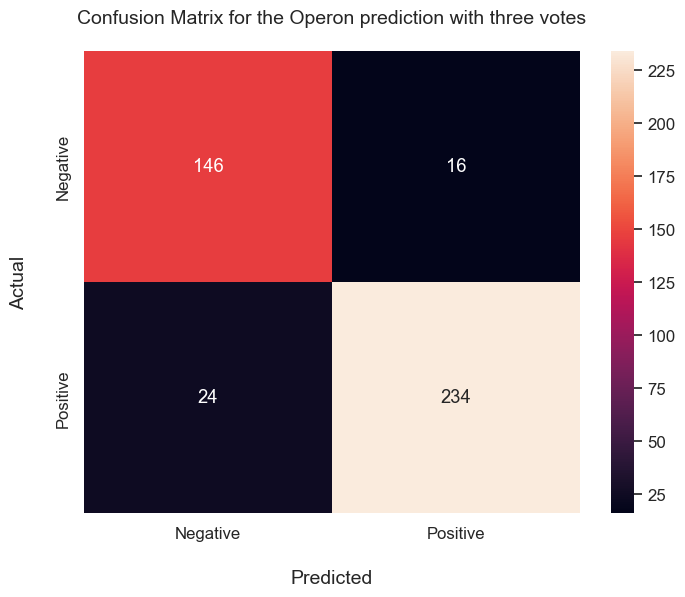

In [5]:
# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train.values.ravel())
y_pred_xgb = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(accuracy_score(y_test, y_pred_xgb))
print(precision_score(y_test, y_pred_xgb))
print(recall_score(y_test, y_pred_xgb))

plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', )
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_title("Confusion Matrix for the Operon prediction with three votes", fontsize=14, pad=20)

/var/folders/zn/y919h6j11dx5td3dlhdymymh0000gn/T/ipykernel_5814/3879230834.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


[[141  21]
 [ 28 230]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       162
           1       0.92      0.89      0.90       258

    accuracy                           0.88       420
   macro avg       0.88      0.88      0.88       420
weighted avg       0.88      0.88      0.88       420

0.8833333333333333
0.9163346613545816
0.8914728682170543


Text(0.5, 1.0, 'Confusion Matrix for the Operon prediction with three votes')

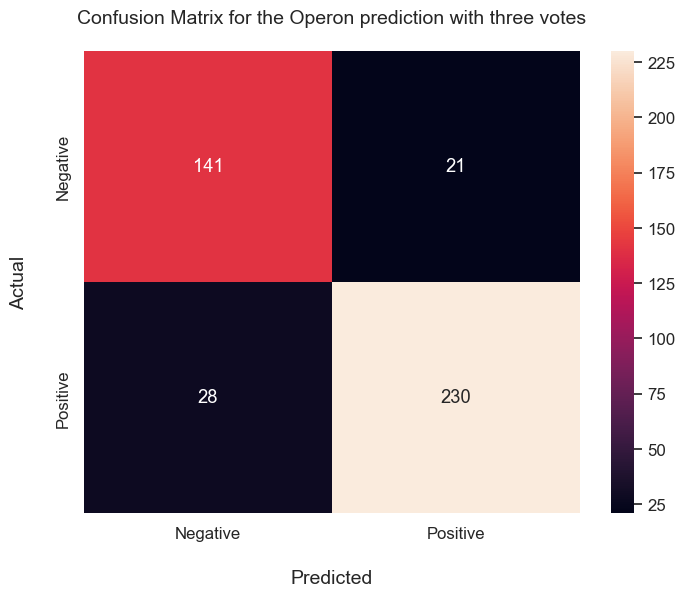

In [6]:
# Random forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))
print(precision_score(y_test, y_pred_rf))
print(recall_score(y_test, y_pred_rf))

plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', )
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_title("Confusion Matrix for the Operon prediction with three votes", fontsize=14, pad=20)

[[119  43]
 [ 23 235]]
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       162
           1       0.85      0.91      0.88       258

    accuracy                           0.84       420
   macro avg       0.84      0.82      0.83       420
weighted avg       0.84      0.84      0.84       420

0.8428571428571429
0.8453237410071942
0.9108527131782945


/Users/mloza/miniconda3/envs/sfml/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Confusion Matrix for the Operon prediction with three votes')

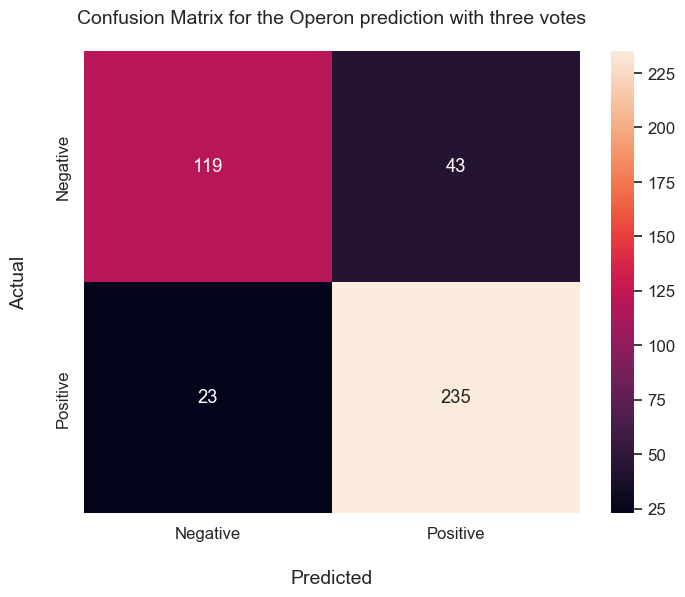

In [7]:
# Support vector machine
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(scale(X_train), y_train)
y_pred_svm = svm_model.predict(scale(X_test))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print(accuracy_score(y_test, y_pred_svm))
print(precision_score(y_test, y_pred_svm))
print(recall_score(y_test, y_pred_svm))

plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', )
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_title("Confusion Matrix for the Operon prediction with three votes", fontsize=14, pad=20)

In [9]:
# Voting
dfg = pd.DataFrame({'xgb': y_pred_xgb,'rf': y_pred_rf,'svm': y_pred_svm,'mo': y_test['pred']})
dfg['sum'] = dfg['xgb'] + dfg['rf'] + dfg['svm']
dfg['one'] = dfg['sum'].apply(lambda x: 1 if x >= 1 else 0)
dfg['two'] = dfg['sum'].apply(lambda x: 1 if x >= 2 else 0)
dfg['three'] = dfg['sum'].apply(lambda x: 1 if x >= 3 else 0)

[[116  46]
 [ 17 241]]
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       162
           1       0.84      0.93      0.88       258

    accuracy                           0.85       420
   macro avg       0.86      0.83      0.84       420
weighted avg       0.85      0.85      0.85       420

0.85
0.8397212543554007
0.9341085271317829


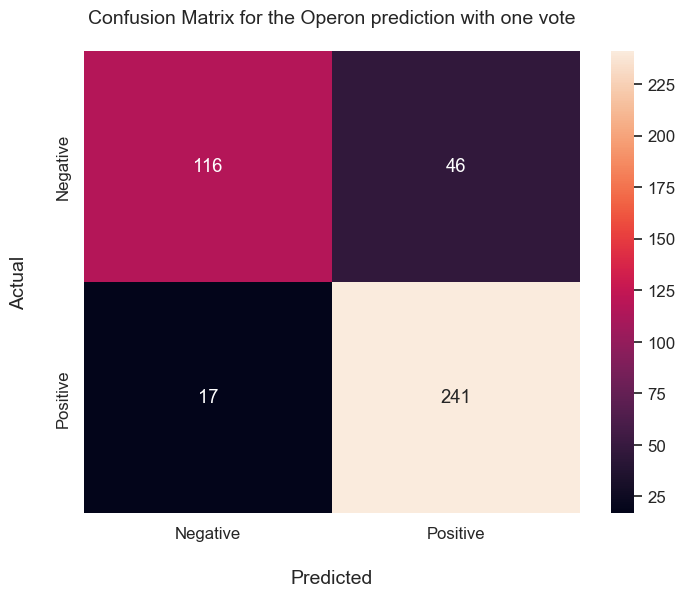

In [10]:
# one algorithm
print(confusion_matrix(y_test, dfg['one']))
print(classification_report(y_test, dfg['one']))
print(accuracy_score(y_test, dfg['one']))
print(precision_score(y_test, dfg['one']))
print(recall_score(y_test, dfg['one']))

plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(confusion_matrix(y_test, dfg['one']), annot=True, fmt='d', )
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_title("Confusion Matrix for the Operon prediction with one vote", fontsize=14, pad=20)
plt.show()

[[141  21]
 [ 26 232]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       162
           1       0.92      0.90      0.91       258

    accuracy                           0.89       420
   macro avg       0.88      0.88      0.88       420
weighted avg       0.89      0.89      0.89       420

0.888095238095238
0.9169960474308301
0.8992248062015504


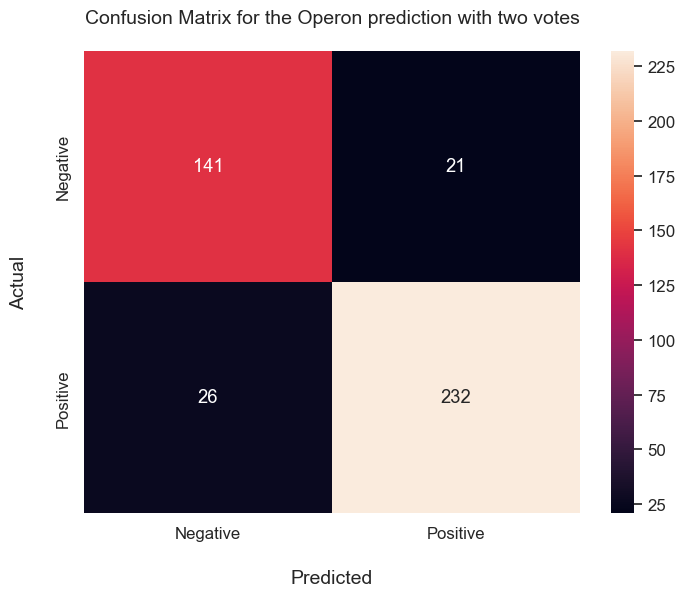

In [11]:
# two algorithm
print(confusion_matrix(y_test, dfg['two']))
print(classification_report(y_test, dfg['two']))
print(accuracy_score(y_test, dfg['two']))
print(precision_score(y_test, dfg['two']))
print(recall_score(y_test, dfg['two']))

plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(confusion_matrix(y_test, dfg['two']), annot=True, fmt='d', )
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_title("Confusion Matrix for the Operon prediction with two votes", fontsize=14, pad=20)
plt.show()

[[149  13]
 [ 32 226]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       162
           1       0.95      0.88      0.91       258

    accuracy                           0.89       420
   macro avg       0.88      0.90      0.89       420
weighted avg       0.90      0.89      0.89       420

0.8928571428571429
0.9456066945606695
0.875968992248062


Text(0.5, 1.0, 'Confusion Matrix for the Operon prediction with three votes')

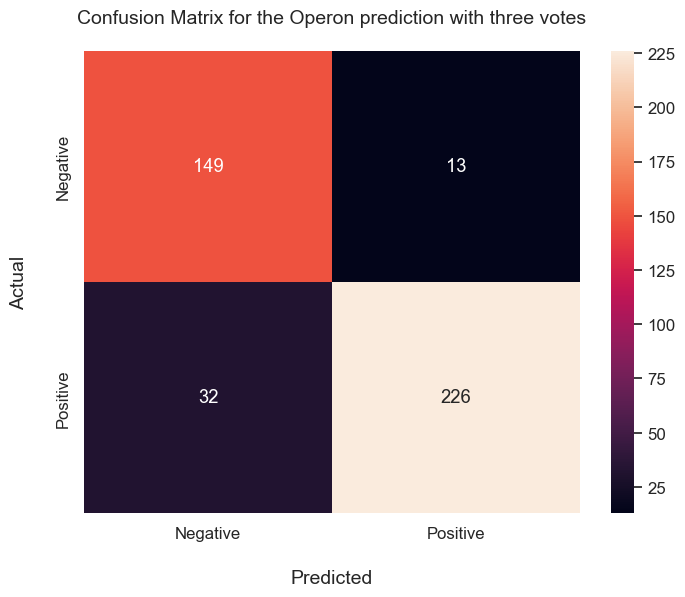

In [12]:
# three algorithm
print(confusion_matrix(y_test, dfg['three']))
print(classification_report(y_test, dfg['three']))
print(accuracy_score(y_test, dfg['three']))
print(precision_score(y_test, dfg['three']))
print(recall_score(y_test, dfg['three']))

plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(confusion_matrix(y_test, dfg['three']), annot=True, fmt='d', )
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_title("Confusion Matrix for the Operon prediction with three votes", fontsize=14, pad=20)

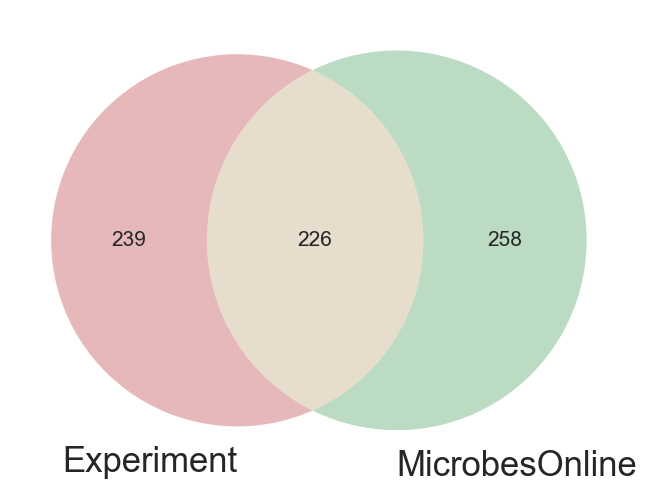

In [13]:
agree = len(dfg[(dfg['mo'] ==1) & (dfg['three']== 1)])
experiment = len(dfg[dfg['three']== 1])
mo = len(dfg[dfg['mo'] ==1])

plt.figure(figsize=(10,6))
v_diag = venn2(subsets = (experiment, mo, agree), set_labels = ('Experiment', 'MicrobesOnline'))
for text in v_diag.set_labels:
   text.set_fontsize(25)
for text in v_diag.subset_labels:
   text.set_fontsize(15)
plt.show()

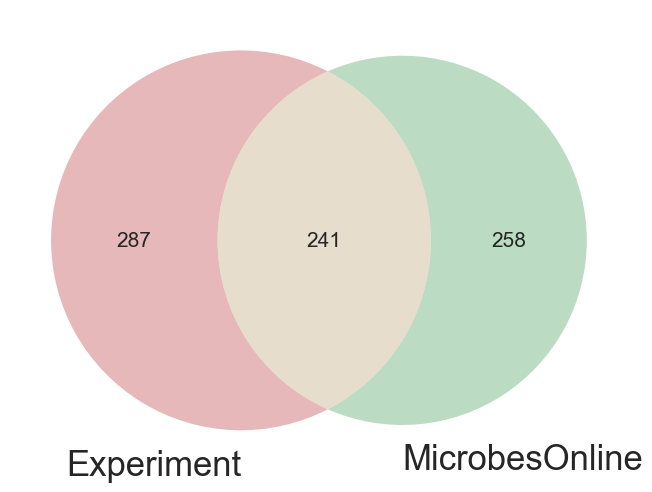

In [14]:
agree = len(dfg[(dfg['mo'] ==1) & (dfg['one']== 1)])
experiment = len(dfg[dfg['one']== 1])
mo = len(dfg[dfg['mo'] ==1])

plt.figure(figsize=(10,6))
v_diag = venn2(subsets = (experiment, mo, agree), set_labels = ('Experiment', 'MicrobesOnline'))
for text in v_diag.set_labels:
   text.set_fontsize(25)
for text in v_diag.subset_labels:
   text.set_fontsize(15)
plt.show()